In [1]:
import yfinance as yf
from yahoofinancials import YahooFinancials
import pandas as pd

In [2]:
yahoo_financials = YahooFinancials('BTC-USD')
data_btc = yahoo_financials.get_historical_price_data('2017-01-01', '2022-05-01', 'daily')
df = pd.DataFrame(data_btc['BTC-USD']['prices'])
df.head()

,date,high,low,open,close,volume,adjclose,formatted_date
0,1483228800,1003.080017,958.698975,963.658020,998.325012,147775008,998.325012,2017-01-01
1,1483315200,1031.390015,996.702026,998.617004,1021.750000,222184992,1021.750000,2017-01-02
2,1483401600,1044.079956,1021.599976,1021.599976,1043.839966,185168000,1043.839966,2017-01-03
3,1483488000,1159.420044,1044.400024,1044.400024,1154.729980,344945984,1154.729980,2017-01-04
4,1483574400,1191.099976,910.416992,1156.729980,1013.380005,510199008,1013.380005,2017-01-05


In [3]:
X = df.drop(df.columns.difference(['formatted_date']), axis='columns')
X['formatted_date'] = pd.to_datetime(df['formatted_date']).values.astype(float)
X.shape

(1947, 1)

In [4]:
Y = df['adjclose']
Y.shape

(1947,)

In [5]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from xgboost.sklearn import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from warnings import simplefilter
# ignore all warnings
simplefilter(action='ignore')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [7]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LGBMR', LGBMRegressor()))
models.append(('XGBR', XGBRegressor()))
models.append(('CBR', CatBoostRegressor(logging_level='Silent')))
models.append(('KR', KernelRidge()))
models.append(('EN', ElasticNet()))
models.append(('BR', BayesianRidge()))
models.append(('GBR', GradientBoostingRegressor()))
models.append(('SVR', SVR()))

In [8]:
names = []
results = []
predictions = []
scores = []
msg_row = []
for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
    names.append(name)
    results.append(cv_results)
    m_fit = model.fit(X_train, y_train)
    m_predict = model.predict(X_test)
    predictions.append(m_predict)
    m_score = model.score(X_test, y_test)
    scores.append(m_score)
    msg = "%s: train = %.3f (%.3f) / test = %.3f" % (name, cv_results.mean(), cv_results.std(), m_score)
    msg_row.append(msg)
    print(msg)

LR: train = 0.626 (0.027) / test = 0.624
LGBMR: train = 0.995 (0.001) / test = 0.994
XGBR: train = 0.997 (0.001) / test = 0.997
CBR: train = 0.995 (0.002) / test = 0.995
KR: train = 0.025 (0.020) / test = 0.042
EN: train = 0.626 (0.027) / test = 0.624
BR: train = 0.626 (0.027) / test = 0.624
GBR: train = 0.995 (0.001) / test = 0.995
SVR: train = -0.182 (0.024) / test = -0.199


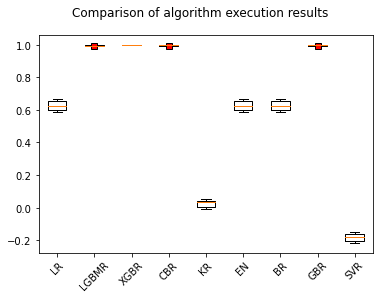

In [10]:
from matplotlib import pyplot

fig = pyplot.figure()
fig.suptitle('Comparison of algorithm execution results')
ax = fig.add_subplot(111)
red_square = dict(markerfacecolor='r', marker='s')
pyplot.boxplot(results, flierprops=red_square)
ax.set_xticklabels(names, rotation=45)
pyplot.show()